<a href="https://colab.research.google.com/github/hemanth2005-tech/Student-Performance-Analysis/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

In [5]:
# Install dependencies (if needed)
!pip install seaborn scikit-learn

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score



In [6]:
from google.colab import files

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()


Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


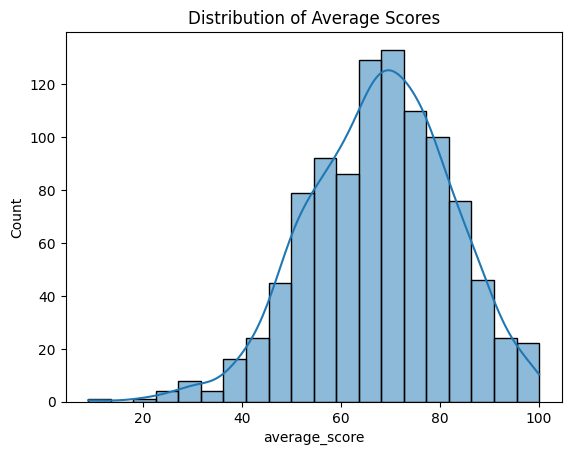

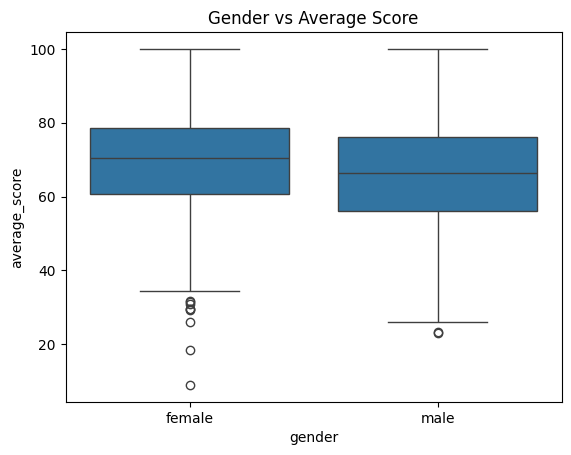

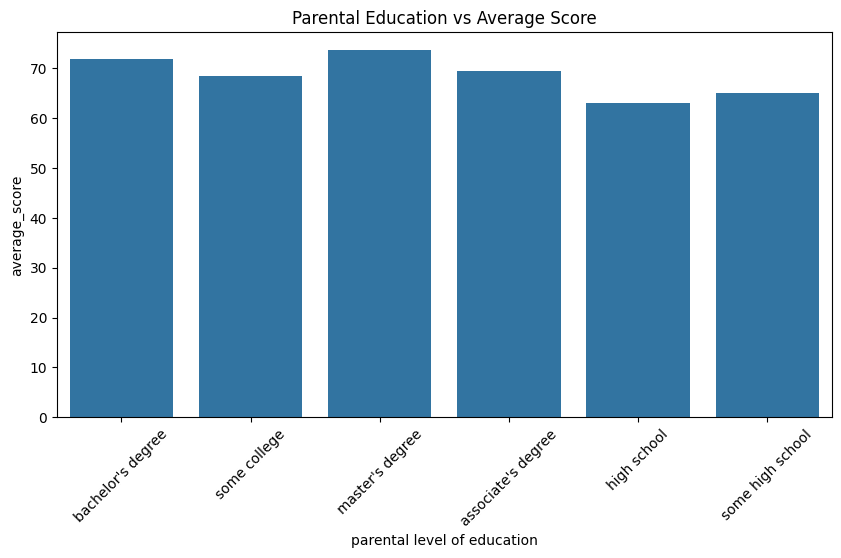

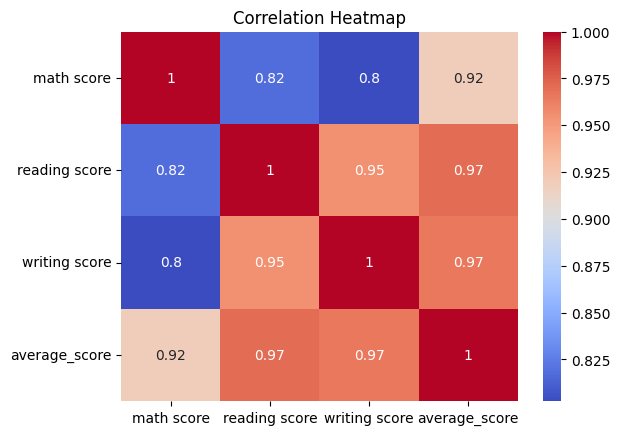

In [8]:
# Average score column
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)

# Distribution of average score
sns.histplot(df['average_score'], bins=20, kde=True)
plt.title("Distribution of Average Scores")
plt.show()

# Gender vs Average Score
sns.boxplot(x='gender', y='average_score', data=df)
plt.title("Gender vs Average Score")
plt.show()

# Parental education vs Average Score
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='average_score', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title("Parental Education vs Average Score")
plt.show()

# Correlation heatmap
sns.heatmap(df[['math score','reading score','writing score','average_score']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Data cleaning & New Columns


In [9]:

# Pass if average score >= 50, else Fail
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)
df[['average_score','pass']].head()


,average_score,pass
0,72.666667,1
1,82.333333,1
2,92.666667,1
3,49.333333,0
4,76.333333,1


In [10]:
# Drop target + average_score
X = df.drop(['average_score','pass'], axis=1)
y = df['pass']

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.995
Confusion Matrix:
 [[ 26   1]
 [  0 173]]


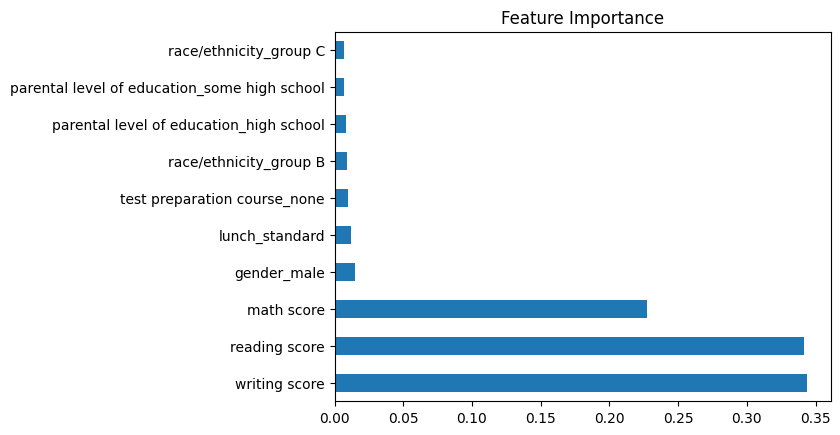

In [13]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


Regression- Train/Test split

In [14]:
# Features = all columns except average_score & pass
X_reg = df.drop(['average_score','pass'], axis=1)

# Target = average_score
y_reg = df['average_score']

# Convert categorical variables into dummy/indicator variables
X_reg = pd.get_dummies(X_reg, drop_first=True)

X_reg.head()



,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [15]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression Train shape:", Xr_train.shape)
print("Regression Test shape:", Xr_test.shape)


Regression Train shape: (800, 15)
Regression Test shape: (200, 15)


Linear Regression


In [17]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr = LinearRegression()
lr.fit(Xr_train, yr_train)

# Predictions
y_pred_lr = lr.predict(Xr_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(yr_test, y_pred_lr))
r2 = r2_score(yr_test, y_pred_lr)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)


Linear Regression RMSE: 1.537754677928344e-14
Linear Regression R²: 1.0


Regression- RandomForest

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(Xr_train, yr_train)   # <-- IMPORTANT: train first!

# Predictions
y_pred_rf = rf.predict(Xr_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(yr_test, y_pred_rf))
r2 = r2_score(yr_test, y_pred_rf)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)


Random Forest RMSE: 1.1384794684138986
Random Forest R²: 0.9939536490220724


Conclusion

In [20]:
print("🔹 Linear Regression R²:", r2_score(yr_test, y_pred_lr))
print("🔹 Random Forest R²:", r2_score(yr_test, y_pred_rf))


🔹 Linear Regression R²: 1.0
🔹 Random Forest R²: 0.9939536490220724


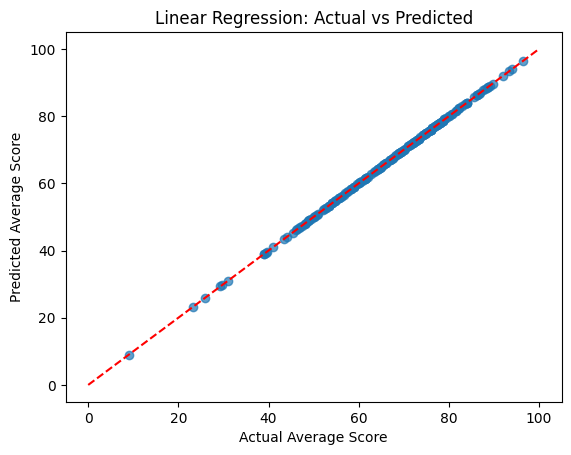

In [21]:
plt.scatter(yr_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([0,100],[0,100], color="red", linestyle="--")  # reference line
plt.show()


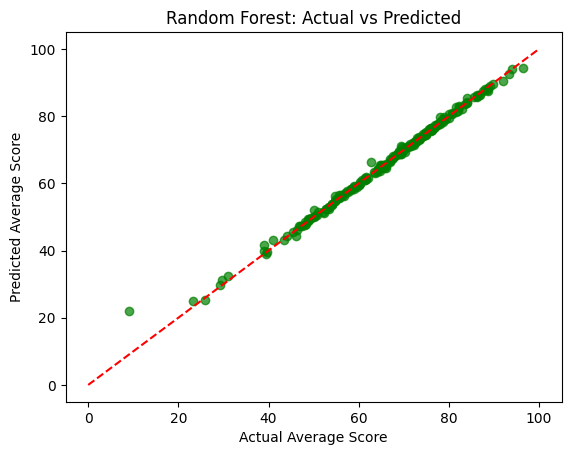

In [22]:
plt.scatter(yr_test, y_pred_rf, alpha=0.7, color="green")
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([0,100],[0,100], color="red", linestyle="--")  # reference line
plt.show()
